In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
url = 'https://raw.githubusercontent.com/rajavi812/ADS-Dataset/master/Bank_Personal_Loan_Modelling.csv' 
dataset = pd.read_csv(url)
dataset.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
dataset.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
dataset.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


####Correlation > 0.05

age-exp= 0.99

cc-avg-income=0.645

family-personal loan=0.061

cc-avg-personal loan=0.366

cd account - cc avg = 0.136

education- personal loan  = 0.136

mortgage - cd account = 0.089

cd account - personal loan = 0.316

securities account - cdaccount  = 0.317

cd account - online  = 0.175


In [ ]:
dataset.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [ ]:
#Some  column names have a space between the words which makes it difficult for performing classification
#Rename the columns
dataset = dataset.rename(columns={'ZIP Code': 'ZIP_Code', 'Securities Account':'Securities_Account', 'Personal Loan':'Personal_Loan','CD Account':'CD_Account'})
dataset.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP_Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

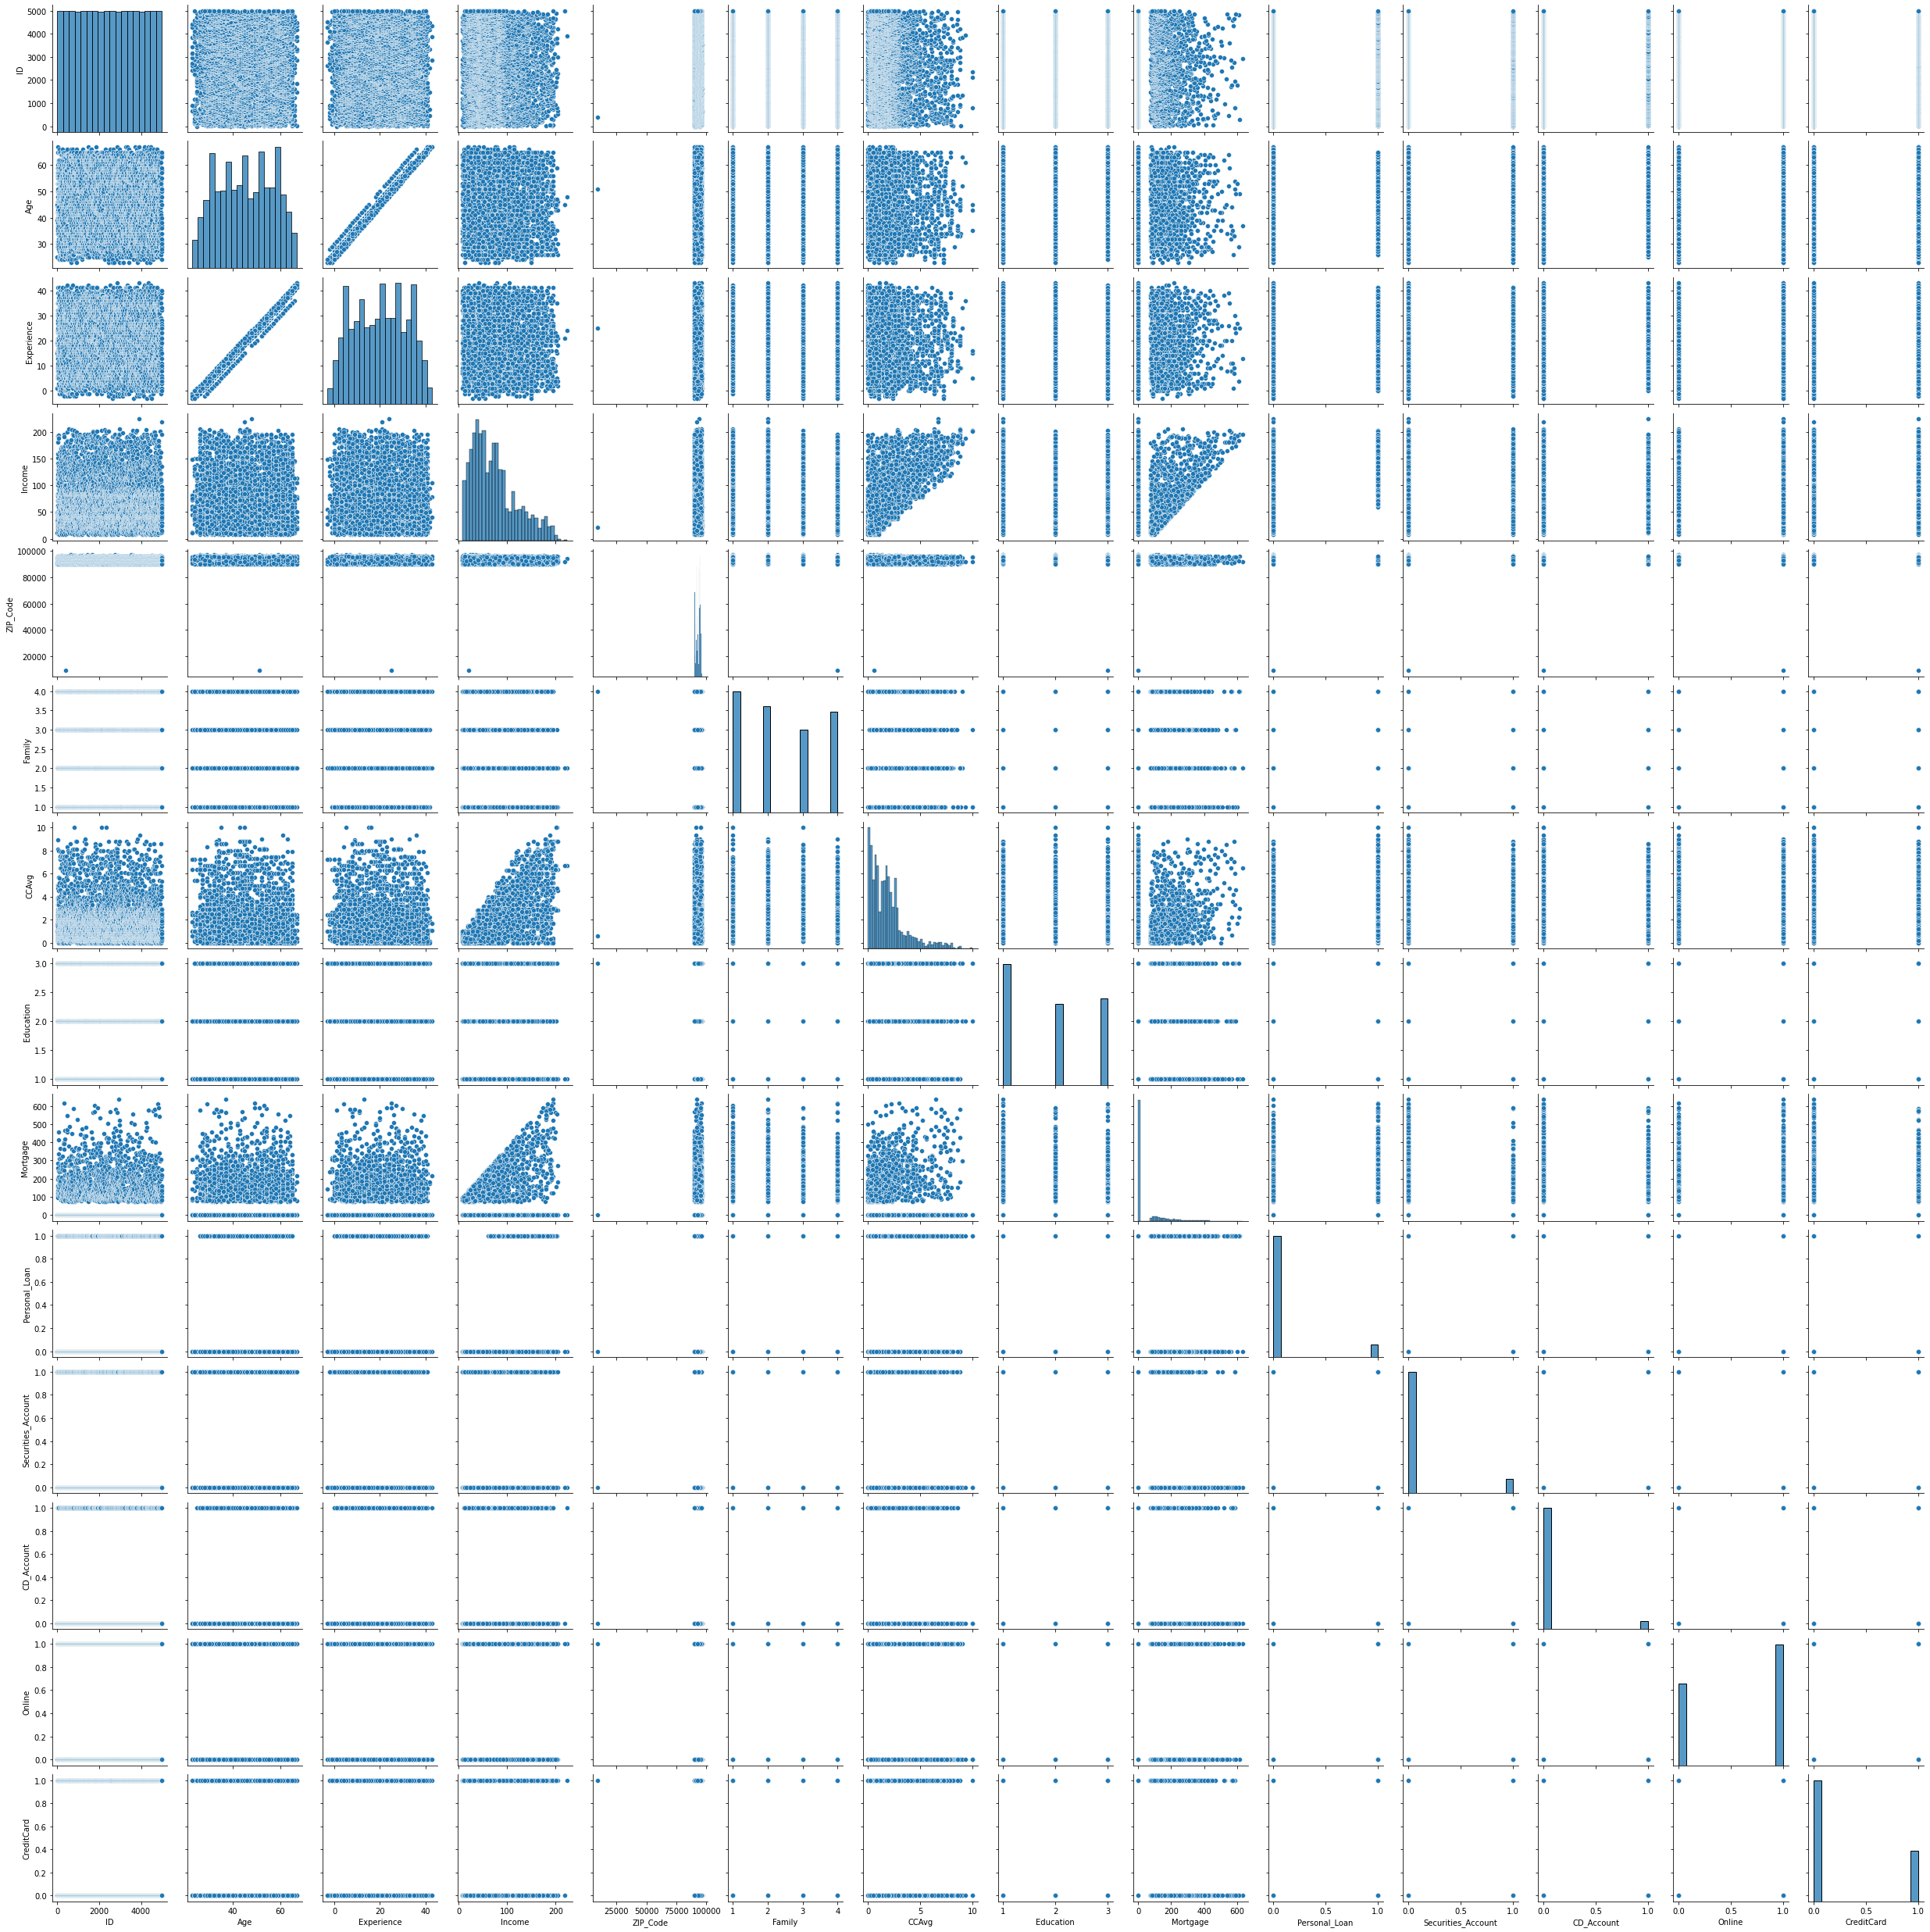

In [ ]:
#pairplot to understand the relation between the variables
sns.pairplot(dataset)

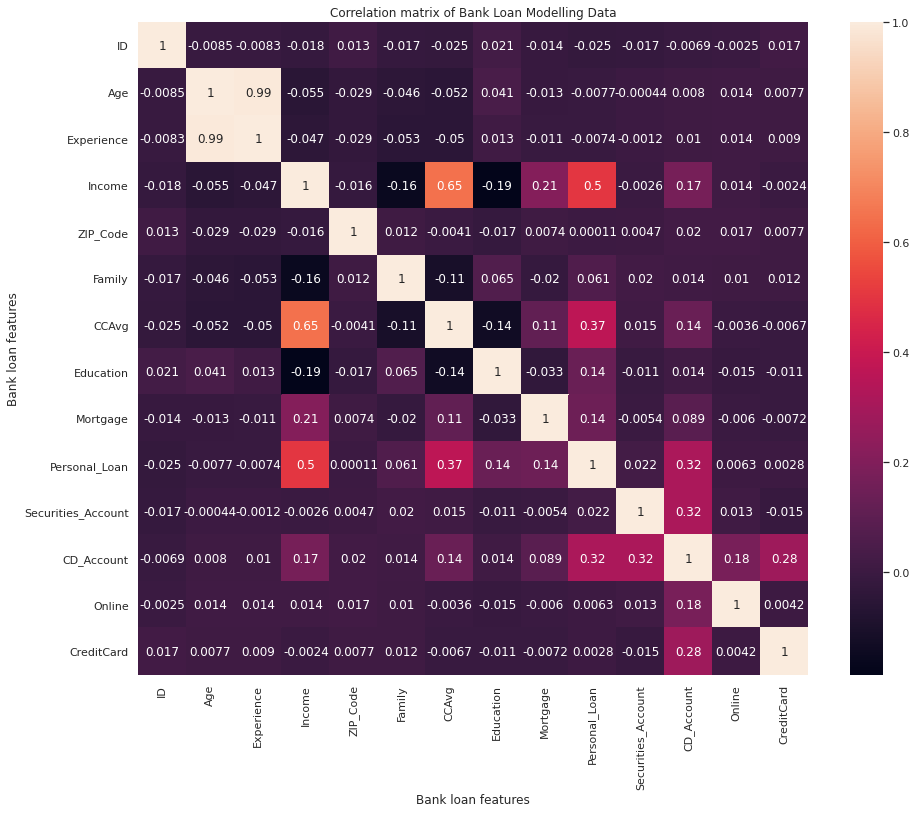

In [ ]:
#Correlation Matrix
sns.set(rc={'figure.figsize':(15,12)})
correlation = dataset.corr()
sns.heatmap(correlation, annot = True)

plt.title("Correlation matrix of Bank Loan Modelling Data")
plt.xlabel('Bank loan features')
plt.ylabel('Bank loan features')
plt.show()

In [ ]:
#Each row has a unique value for ID
dataset.ID.drop_duplicates().count() 

5000

In [ ]:
#Drop ID 
dataset =  dataset.drop(['ID'], axis= 1)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIP_Code            5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


In [ ]:
#Separating the Feature and Target variables
y = dataset['Personal_Loan']
dataset =  dataset.drop(['Personal_Loan'], axis= 1) 

In [ ]:
# To know about the target summary
y.describe() 

count    5000.000000
mean        0.096000
std         0.294621
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Personal_Loan, dtype: float64

In [ ]:
# To know about the Feature variables summary
dataset.describe()

,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
#Splitting the data into Continuous and Categorial values assuming that categorical values have <10 unique values
categorical_val = []
continous_val = []
for column in dataset.columns:
    print('==============================')
    print(f"{column} : {dataset[column].unique()}")
    if len(dataset[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

print(categorical_val)
print(continous_val)

Age : [25 45 39 35 37 53 50 34 65 29 48 59 67 60 38 42 46 55 56 57 44 36 43 40
 30 31 51 32 61 41 28 49 47 62 58 54 33 27 66 24 52 26 64 63 23]
Experience : [ 1 19 15  9  8 13 27 24 10 39  5 23 32 41 30 14 18 21 28 31 11 16 20 35
  6 25  7 12 26 37 17  2 36 29  3 22 -1 34  0 38 40 33  4 -2 42 -3 43]
Income : [ 49  34  11 100  45  29  72  22  81 180 105 114  40 112 130 193  21  25
  63  62  43 152  83 158  48 119  35  41  18  50 121  71 141  80  84  60
 132 104  52 194   8 131 190  44 139  93 188  39 125  32  20 115  69  85
 135  12 133  19  82 109  42  78  51 113 118  64 161  94  15  74  30  38
   9  92  61  73  70 149  98 128  31  58  54 124 163  24  79 134  23  13
 138 171 168  65  10 148 159 169 144 165  59  68  91 172  55 155  53  89
  28  75 170 120  99 111  33 129 122 150 195 110 101 191 140 153 173 174
  90 179 145 200 183 182  88 160 205 164  14 175 103 108 185 204 154 102
 192 202 162 142  95 184 181 143 123 178 198 201 203 189 151 199 224 218]
ZIP_Code : [91107 90089 94720 94

In [ ]:
print(continous_val)

['Age', 'Experience', 'Income', 'ZIP_Code', 'CCAvg', 'Mortgage']


##Data Exploration

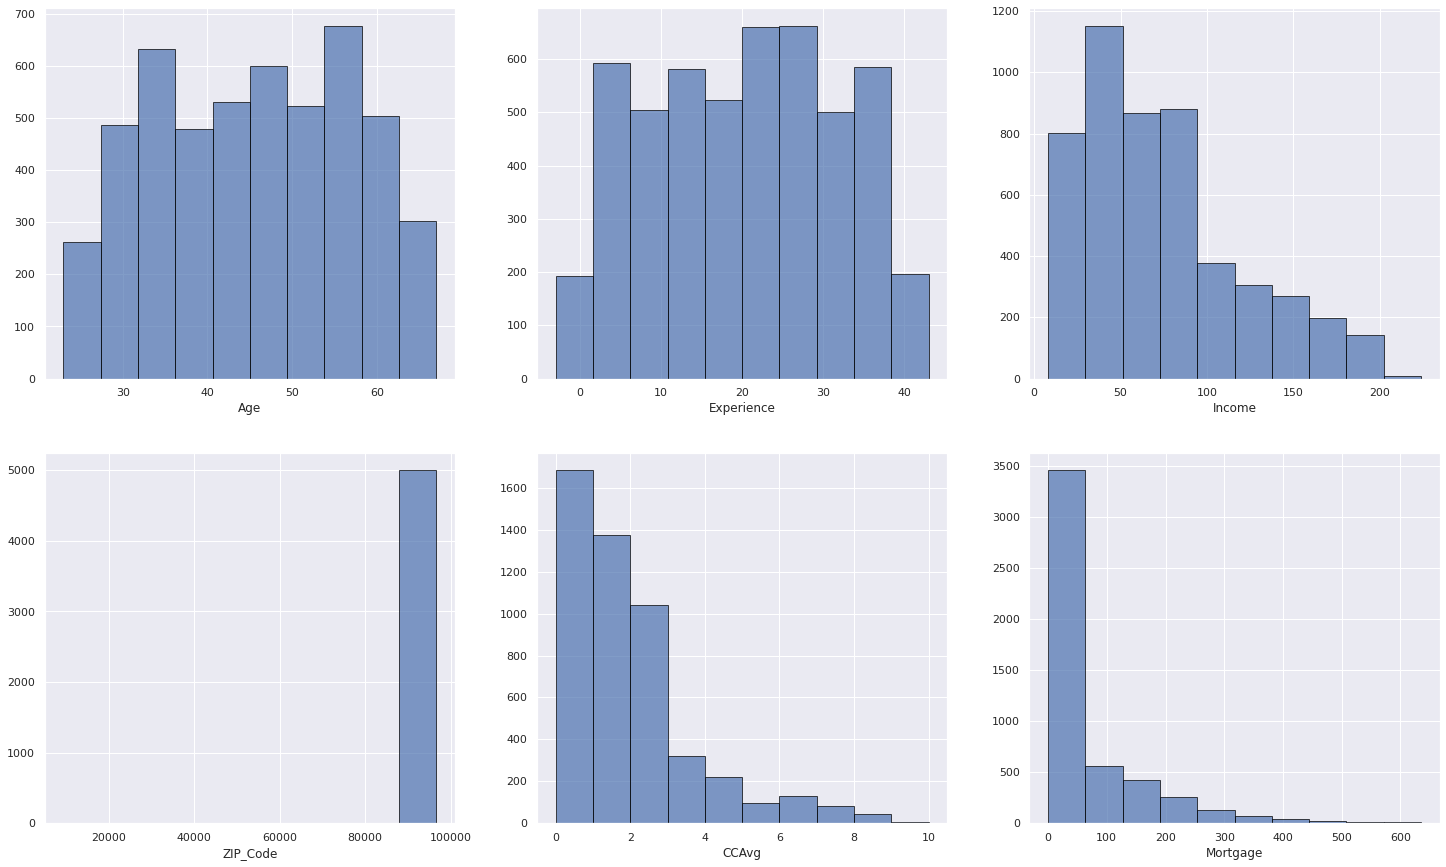

In [ ]:
#plotting all the continuous values to check distribution
plt.figure(figsize=(25, 15))

for i in range(0,len(continous_val)):
    plt.subplot(2, 3, i+1)
    plt.hist(dataset[continous_val[i]], edgecolor = 'black', alpha = 0.7)
    plt.xlabel(continous_val[i])


In [ ]:
print(len(categorical_val))
print(categorical_val)

6
['Family', 'Education', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']


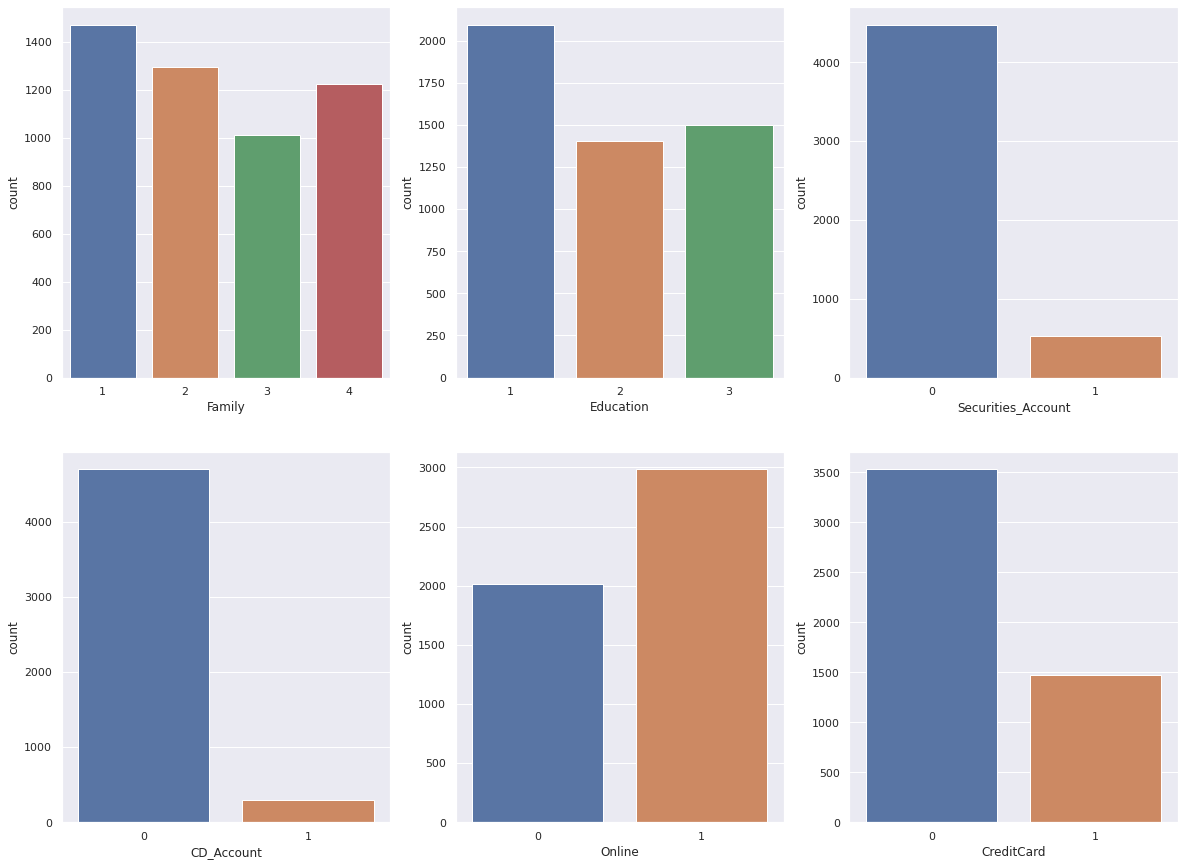

In [ ]:
#plotting all the categorical values to check distribution

plt.figure(figsize=(20, 15))

for i in range(0,len(categorical_val)):
    plt.subplot(2, 3, i+1)
    sns.countplot(x = dataset[categorical_val[i]])
    plt.xlabel(categorical_val[i])

From the above plots, we can infer that:
1. Average age of customers is 45yrs
2. Customers have avg experience around 20-30yrs
3. Very few customers are in the high income bracket
4. Majority of the customers are educated till the undergraduate level
5. Most customers do  not have a Securities Account with the bank
6. Most customers do not have a CD_Account with the bank
7. Majority of the customers use online banking
8. Most of the customers do not have a credit card
9. There are no null values in the dataset

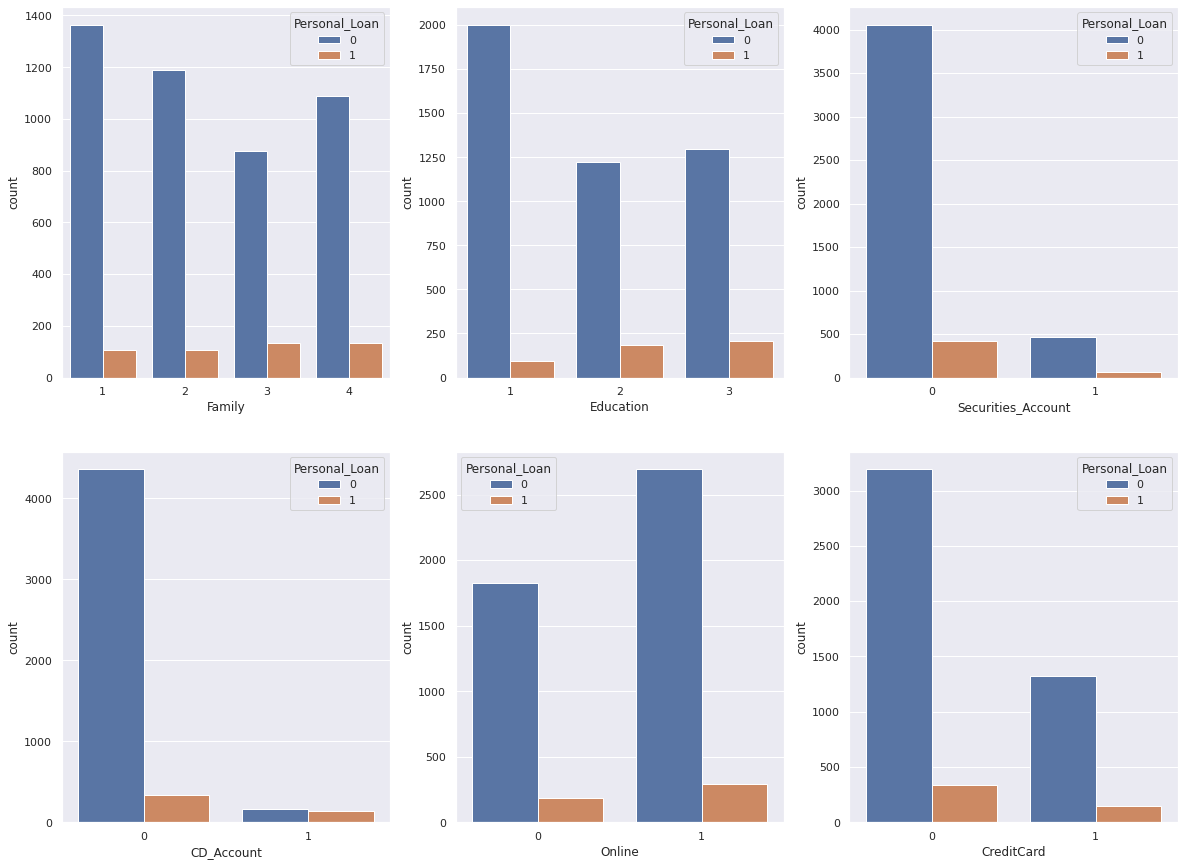

In [ ]:
#plotting all the categorical values against the target variable

plt.figure(figsize=(20, 15))

for i in range(0,len(categorical_val)):
    plt.subplot(2, 3, i+1)
    sns.countplot(x = dataset[categorical_val[i]], hue = y)
    plt.xlabel(categorical_val[i])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

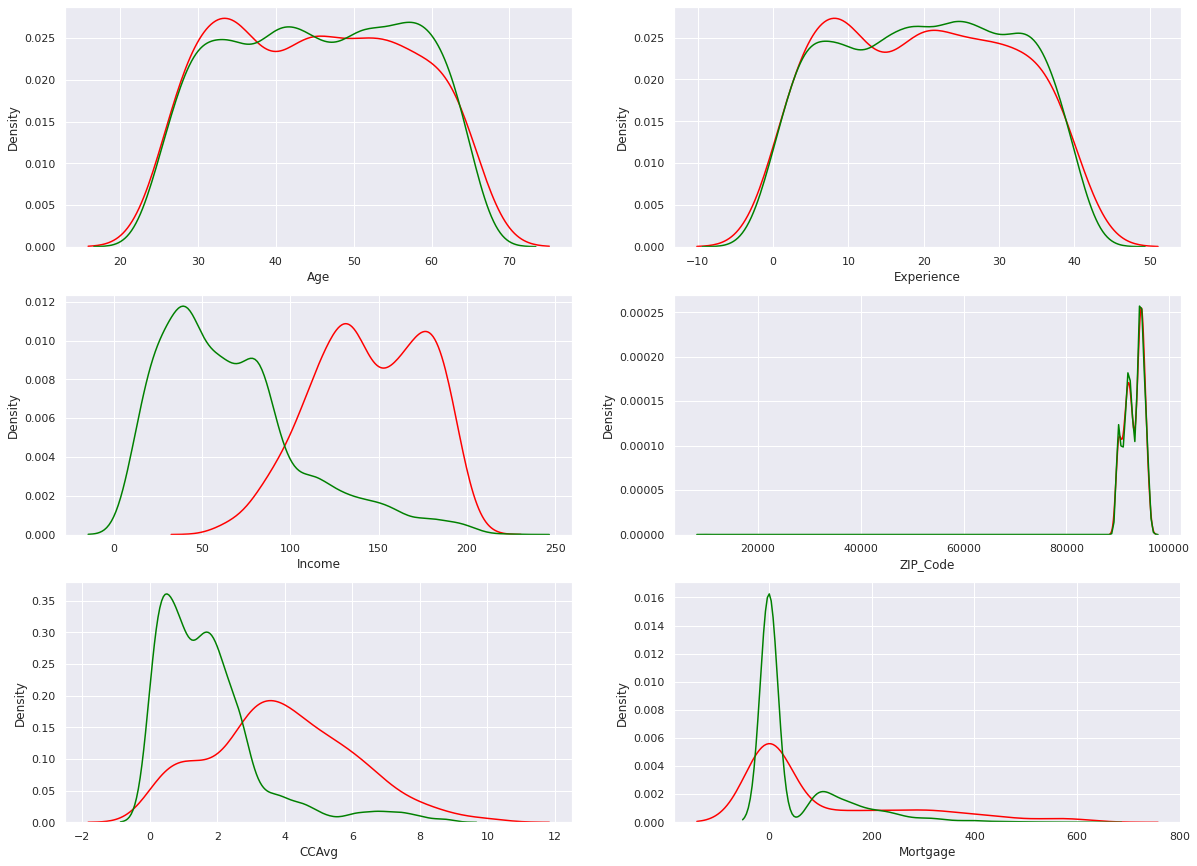

In [ ]:
#plotting all the continuous values against the target variable

plt.figure(figsize=(20, 15))

for i in range(0,len(continous_val)):
    plt.subplot(3,2, i+1)
    #sns.countplot(x = dataset[continous_val[i]], hue = dataset['Personal_Loan'])
    sns.distplot(dataset[y==1][continous_val[i]],kde=True,hist=False,color='red',label="Customer with PL")
    sns.distplot(dataset[y==0][continous_val[i]],kde = True,hist=False,color='green',label="Customer without PL")
    plt.xlabel(continous_val[i])

From the above analysis, we can infer that:
1. The number of customers with higher education are taking Personal Loans as compared to other groups.
2. Customers who operates online tend to take loans more  as compared to non online users
3. Family with size more than 2 are more interested in taking personal loans
4. Customers with no credit card are taking personal loans more
5. Customers with no security accounts are buying personal loans more than the ones with the security accounts


In [ ]:
#loading the dataset again as previously I dropped one column for plotting the above graphs as its datatype was changing after separation in categorical and continuous variables
dataset  = pd.read_csv(url)
dataset = dataset.rename(columns={'ZIP Code': 'ZIP_Code', 'Securities Account':'Securities_Account', 'Personal Loan':'Personal_Loan','CD Account':'CD_Account'})

In [ ]:
dataset =  dataset.drop(['ID'], axis= 1)

In [ ]:
import statsmodels.formula.api as smf
model = smf.logit('Personal_Loan ~ Age + Experience + Income + ZIP_Code + Family + CCAvg + Education + Mortgage + Securities_Account + CD_Account + Online + CreditCard', data = dataset).fit()
model.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Optimization terminated successfully.
         Current function value: 0.128434
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal_Loan   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4987
Method:                           MLE   Df Model:                           12
Date:                Wed, 30 Sep 2020   Pseudo R-squ.:                  0.5938
Time:                        22:17:18   Log-Likelihood:                -642.17
converged:                       True   LL-Null:                       -1581.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -11.8269      4.119     -2.871      0.004     -19.901      -3.753
Age                   -0.0535      0.061     -0.873      0.383      -0.174       0.067
Experience             0.0637      0.061      1.045      0.296      -0.056       0.183
Income                 0.0546      0.003     20.831      0.000       0.049       0.060
ZIP_Code           -3.948e-06   4.08e-05     -0.097      0.923   -8.39e-05     7.6e-05
Family                 0.6958      0.074      9.364      0.000       0.550       0.841
CCAvg                  0.1240      0.040      3.128      0.002       0.046       0.202
Education              1.7360      0.115     15.085      0.000       1.510       1.962
Mortgage               0.0005      0.001      0.854      0.393      -0.001       0.002
Securities_Account    -0.9371      0.286     -3.278      0.001      -1.497      -0.377
CD_Account             3.8240      0.324     11.791      0.000       3.188       4.460
Online                -0.6751      0.157     -4.298      0.000      -0.983      -0.367
CreditCard            -1.1197      0.205     -5.463      0.000      -1.521      -0.718
======================================================================================
"""

In [ ]:
#Droppig columns having p values > 0.05 and are therefore insignificant
dataset =  dataset.drop(['Age', 'Experience', 'ZIP_Code', 'Mortgage'], axis= 1)

In [ ]:
#Scaling the Contiuous Values

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
continous_i = dataset[['Income','CCAvg']]
continous_i = scaler.fit_transform(continous_i)
dataset[['Income', 'CCAvg']] = pd.DataFrame(continous_i)

In [ ]:
y = dataset['Personal_Loan']
X =  dataset.drop(['Personal_Loan'], axis= 1) 

In [ ]:
#Splitting into training and testing set in the ratio of 80:20

from  sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#####Applying Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred_lr = lr.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred_lr))

[[902   8]
 [ 33  57]]


In [ ]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       910
           1       0.88      0.63      0.74        90

    accuracy                           0.96      1000
   macro avg       0.92      0.81      0.86      1000
weighted avg       0.96      0.96      0.96      1000



In [ ]:
#Calculate the accuracy of Logistic Regression model

from sklearn.metrics import accuracy_score
acc_lr = accuracy_score(y_test, y_pred_lr) 
acc_lr = acc_lr*100
acc_lr

95.89999999999999

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. 

This curve plots two parameters:

* True Positive Rate

* False Positive Rate

AUC represents the probability that a random positive example is positioned to the right of a random negative  example.

AUC ranges in value from 0 to 1. 

A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0.

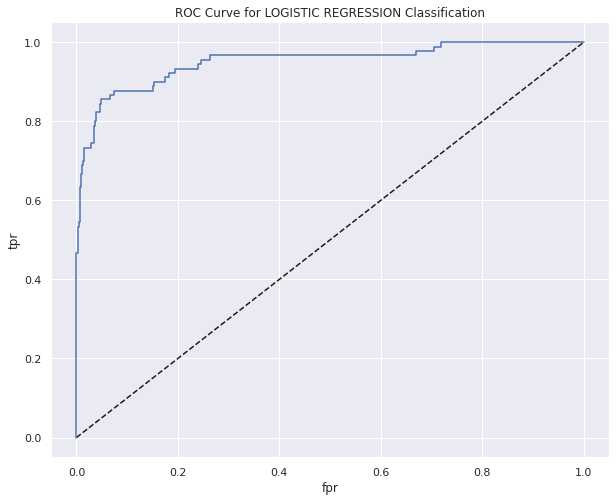

In [ ]:
#ROC Curve for Logistic Regression

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_pred_proba_lr = lr.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_lr)

plt.figure(figsize=(10, 8))
plt.plot([0,1], [0, 1], 'k--')
plt.plot(fpr, tpr,label =  'LOGISTIC REGRESSION')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve for LOGISTIC REGRESSION Classification')
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred_proba_lr)*100

95.06471306471306

* Is the relationship significant?

The significance of the variables can be found from the p values of the variables. That is found above using the logit function. Variables having p value > 0.05 have been dropped as they are not significant for the model

* Are any model assumptions violated?

No

* Is there any multicollinearity in the model?

Multicollinearity was found between the columns Age and Experience, but they were dropped as their p values were > 0.05

* In the multivariate models are predictor variables independent of all the other predictor variables?

The actual dataset did not have independent variables but the variables passed in the model are all independent

* In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

Rankinng  wasn not performed for this model

* Does the model make sense?

The accuracy of the model is 95.89% after passing all the significant values which were found from the p-values, so yes.


* Does regularization help?

Regularizationn helps  to overcome underfittinng or overfiting. 

* Which independent variables are significant?

'Income', 'Family', 'CCAvg', 'Education', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard' are significant variables as  their p values are less tha 0.05  

* Which hyperparameters are important?

Hyperparameter tuning was not performed for this model

* Coding professionalism?

In [ ]:
table_lr = pd.DataFrame(data=[["Logistic Regression", acc_lr]], 
                          columns=['Model', 'Testing Accuracy %'])
table_lr

,Model,Testing Accuracy %
0,Logistic Regression,95.9


#####Implementing Random Forest Model

In [ ]:
#Random Forest Model Building
from sklearn.ensemble import RandomForestClassifier

rand_forest = RandomForestClassifier(n_estimators=50, random_state=42)
rand_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

####Feature Importance for Random Forest

In [ ]:
importance=rand_forest.feature_importances_  
for i,v in enumerate(importance):
    print('The Feature: %0d, Score: %.5f'%(i,v))

The Feature: 0, Score: 0.36575
The Feature: 1, Score: 0.12593
The Feature: 2, Score: 0.21940
The Feature: 3, Score: 0.21314
The Feature: 4, Score: 0.00607
The Feature: 5, Score: 0.04943
The Feature: 6, Score: 0.00800
The Feature: 7, Score: 0.01228


The above feature importance for Random Forest implies that the columns has importance as follows:

Income = 0.36575,

Family = 0.12593,

CCAvg = 0.21940, 

Education  = 0.21314, give more information about the target variable as compared to the columns having importance 

Securities_Account = 0.00607,

CD_Account = 0.04943, 

Online = 0.00800, 

CreditCard = 0.01228

In [ ]:
#Predicting the test data
y_pred_rf = rand_forest.predict(X_test)

In [ ]:
#Printing the confusion matrix and the classification report
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred_rf))

[[906   4]
 [ 10  80]]


In [ ]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       910
           1       0.95      0.89      0.92        90

    accuracy                           0.99      1000
   macro avg       0.97      0.94      0.96      1000
weighted avg       0.99      0.99      0.99      1000



In [ ]:
#Calculate the accuracy of Random Forest model
from sklearn.metrics import accuracy_score
acc_rf = accuracy_score(y_test, y_pred_rf) 
acc_rf = acc_rf*100
acc_rf

98.6

In [ ]:
pd.crosstab(y_test, y_pred_rf, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,906,4,910
1,10,80,90
All,916,84,1000


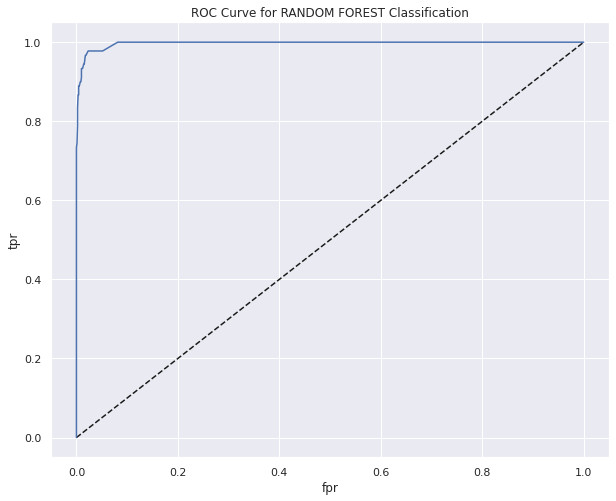

In [ ]:
#ROC Curve for Random Forest 

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_pred_proba_rf = rand_forest.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_rf)

plt.figure(figsize=(10, 8))
plt.plot([0,1], [0, 1], 'k--')
plt.plot(fpr, tpr,label =  'RANDOM FOREST')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve for RANDOM FOREST Classification')
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred_proba_rf)*100

99.70146520146521

* Is the relationship significant?

The significance of the variables can be found from the p values of the variables. That is found above using the logit function. Variables having p value > 0.05 have been dropped as they are not significant for the model


* Are any model assumptions violated?

No

* Is there any multicollinearity in the model?

Multicollinearity was found between the columns Age and Experience, but they were dropped as their p values were > 0.05

* In the multivariate models are predictor variables independent of all the other predictor variables?

The actual dataset did not have all independent predictor variables but the variables passed in the model are all independent

* In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

Ranking  was performed for this model using feature importance for Random Forest 

* Does the model make sense?

The accuracy of the model is 98.6% after passing all the significant values, so yes

* Which independent variables are significant?

'Income', 'Family', 'CCAvg', 'Education', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard' are significant variables as  their p values are less tha 0.05  

* Which hyperparameters are important?

Hyperparameter tuning was not performed for this model

* Coding professionalism?

In [ ]:
table_rf = pd.DataFrame(data=[["Random Forest Classification", acc_rf]], 
                          columns=['Model', 'Testing Accuracy %'])
table_rf = table_rf.append(table_lr, ignore_index=True)
table_rf

,Model,Testing Accuracy %
0,Random Forest Classification,98.6
1,Logistic Regression,95.9


####Implementig  KNN Classification

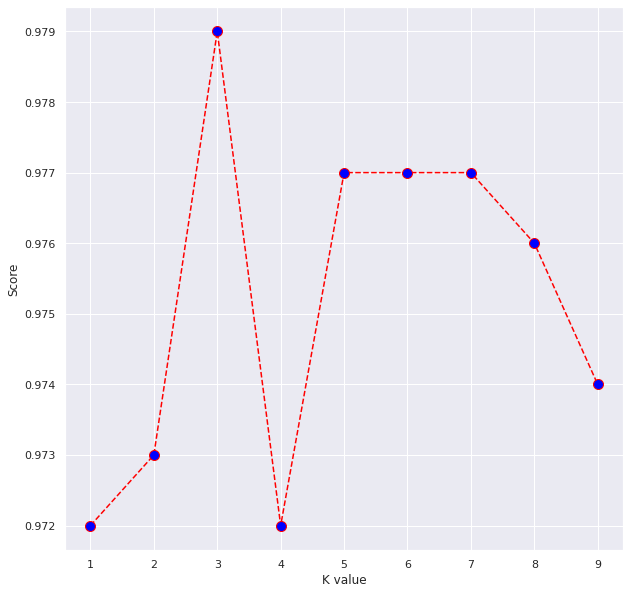

Maximum KNN Score is 97.90%


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

plt.figure(figsize=(10, 10))

# try to find best k value
error = []

for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    error.append(knn.score(X_test,y_test))
    
plt.plot(range(1, 10), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
acc = max(error)*100
print("Maximum KNN Score is {:.2f}%".format(acc))

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train,y_train)
y_pred_knn = classifier.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,y_pred_knn))
print(classification_report(y_test,y_pred_knn))

[[908   2]
 [ 19  71]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       910
           1       0.97      0.79      0.87        90

    accuracy                           0.98      1000
   macro avg       0.98      0.89      0.93      1000
weighted avg       0.98      0.98      0.98      1000



In [ ]:
acc_knn = accuracy_score(y_test, y_pred_knn) 
acc_knn = acc_knn*100
acc_knn

97.89999999999999

In [ ]:
pd.crosstab(y_test, y_pred_knn, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,908,2,910
1,19,71,90
All,927,73,1000


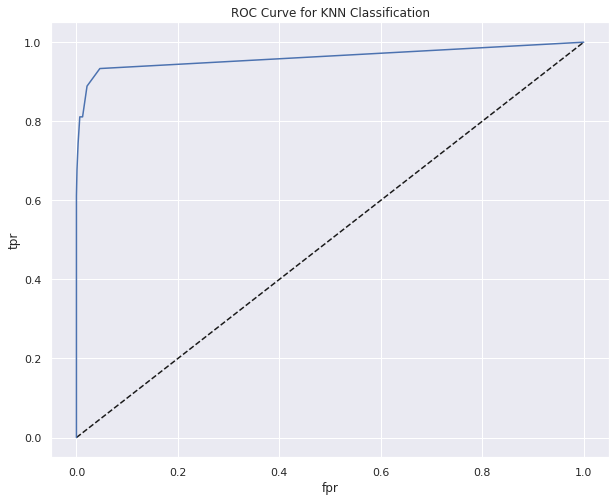

In [ ]:
#ROC Curve for KNN Classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_pred_proba_knn = knn.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_knn)

plt.figure(figsize=(10, 8))

plt.plot([0,1], [0, 1], 'k--')
plt.plot(fpr, tpr,label =  'KNN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve for KNN Classification')
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred_proba_knn)*100

96.18437118437117

####HyperparameterTuning for KNN Classification

In [ ]:
from sklearn.model_selection import GridSearchCV
#Incase  of classifier like  knn the parameter to be tuned is n_neighbors
param_grid= {'n_neighbors':np.arange(1,50)}

In [ ]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
knn_cv.best_score_*100

97.68

In [ ]:
knn_cv.best_params_

{'n_neighbors': 3}

* Is the relationship significant?

The significance of the variables can be found from the p values of the variables. That is found above using the logit function. Variables having p value > 0.05 have been dropped as they are not significant for the model

* Are any model assumptions violated?

No

* Is there any multicollinearity in the model?

Multicollinearity was found between the columns Age and Experience, but they were dropped as their p values were > 0.05

* In the multivariate models are predictor variables independent of all the other predictor variables?

The actual dataset did not have independent variables but the variables passed in the model are all independent

* In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

Rankinng  wasn not performed for this model

* Does the model make sense?

The accuracy of the model is 95.89% after passing all the significant values which were found from the p-values. 


* Does regularization help?

Regularizationn helps  to overcome underfittinng or overfiting. 

* Which independent variables are significant?

'Income', 'Family', 'CCAvg', 'Education', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard' are significant variables as  their p values are less tha 0.05  

* Which hyperparameters are important?

Hyperparameter tuning was performed for this model. For knn classification model,  no  of nearest neighbours can be tuned to improve performance. 
I performed it to find that the best no of neighbours was 3. I found that  earlier too by plotting the graph to show the accuracy values found at different no of neighbours values and got the same answer, 3, i.e. the max accuracy was when no of neighbours was 3.

* Coding professionalism?

###Conclusion

After performing data exploration and data cleansing on the dataset and finding significant features for feature selection using p values and using them to set up the classification models for Logistic Regression, Random Forest Classification and KNN Classification, I found that the best accuracy was given by the Random Forest Classification,compared to the other two alogirthms, as shown in the table below.

In [ ]:
table_knn = pd.DataFrame(data=[["KNN Classification", acc_knn]], 
                          columns=['Model', 'Testing Accuracy %'])
table_knn = table_knn.append(table_rf, ignore_index=True)
table_knn

,Model,Testing Accuracy %
0,KNN Classification,97.9
1,Random Forest Classification,98.6
2,Logistic Regression,95.9


--------------------------------------------------------------------------------------------
Citations

https://likegeeks.com/python-correlation-matrix/#Interpreting-the-correlation-matrix

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

https://medium.com/analytics-vidhya/accuracy-vs-f1-score-6258237beca2

https://statisticsbyjim.com/regression/interpret-coefficients-p-values-regression/#:~:text=Regression%20analysis%20is%20a%20form,correlation%20with%20the%20dependent%20variable

https://www.kaggle.com/karthikbaskar/bank-loan-modelling

https://www.kaggle.com/nazeernazeer/classification-logistic-knn-naivebayes-roc-auc

--------------------------------------------------------------------------------------------